# Spotify: Top songs
                                              -Top songs listened in 2019 on spotify

<img src="https://www.sydneybrouwer.com/wp-content/uploads//2019/07/listen-on-spotify-logo.png">

### Content

<font color='green'>
    
* [Introduction: Spotify](#Introduction)
* [Data description and objectives](#Data_description_and_objectives)
* [Spotify trends: data acquisiton, manipulation and validation](#Analysis_of_Spotify_trends)
* [Data visualizations](#Data_visualizations) 
* [Conclusion](#Conclusion)

<a id="Introduction"></a>
## 1.Introduction

    Spotify is an online audio streaming service that lets you listen to music, audiobooks, and podcasts legally and for free without downloading them to your device. Available as a website, applications for all operating systems, smartphones, smart devices and car media systems. The service accounts for more than 36% of the world's audio streaming, it is available in America, all countries in Europe, some countries in Asia and Africa, Australia and New Zealand.
    
    Spotify was officially launched on October 7, 2008. The startup received $ 21.6 million in Series A funding from Horizons Ventures and Wellington Partners. In Series B and C, the start-up was able to secure $ 50 million and $ 16.1 million in investments. In September 2010, just two years after the launch of the project, Spotify's catalog included over 10 million songs. The creators came close to iTunes, whose collection at that time contained about 11 million tracks.

    In March 2011, the number of iTunes service users reached 6.67 million. At the same time, about a million users had a paid subscription. In November of the same year, the number of paid subscriptions reached 2.5 million. In December 2012, this music service was already used by 20 million users (5 million of them - on a paid basis). In 2013, the startup Spotify was valued at $ 10 billion. In 2014, the base of regular users of the service increased to 50 million people. The number of paid subscriptions was 12.5 million.



<a id="Data_description_and_objectives"></a>
## 2.Data description and objectives

Based on the above description of Spotify, it is clear that this platform is very well known in all countries and is a major music service that gives you access to millions of songs. And in this analysis I am interested in comparing different characteristics.

Below is data that we will be scraped and used for our analysis:

+ Title- Song's title
+ Artist- Song's artist
+ Genre- the genre of the track
+ Year-song release date.
+ Bpm-Beats.Per.Minute - The tempo of the song.
+ Nrgy-Energy- The energy of a song - the higher the value, the more energtic. song
+ Dnce-Danceability - The higher the value, the easier it is to dance to this song.
+ dB-Loudness..dB.. - The higher the value, the louder the song.
+ Valence - The higher the value, the more positive mood for the song.
+ Dur-Length - The duration of the song.
+ Spch-speechiness - The higher the value the more spoken word the song contains.
+ Pop-Popularity- The higher the value the more popular the song is.
+ Country-where is this song popular mostly.
+ info: https://www.kaggle.com/leonardopena




For this project, data analysis and visualization contains 5 parts:

1. Analysis for music trends and how top charts are structured ?
2. What genre is the most listened to? And provide examples.
3. What is the main difference and advantages of the Spotify comparable to other music platforms ?
4. Who is the most valuable artist?
5. Analyze tracks by their parameters and find the correlation between them, whether they are available, and whether they depend on popularity? 



<a id="Analysis_of_Spotify_trends"></a>
## 3. Data acquisiton, manipulation and validation

### 3.1. Data acquisiton: Scraping information about Spotify

In [68]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import date, timedelta
from time import time
from time import sleep
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [69]:
df = pd.read_csv("top.csv", sep="," , encoding='latin-1')

### 3.2 Scrapping part

In [73]:
import pandas as pd
import requests
import io

from datetime import date, timedelta
from time import time, sleep
import random

from tqdm import tqdm
# import click

from joblib import Parallel, delayed




def get_download_url(top_type='regional',
                     country='global',
                     time_period_type='weekly',
                     time_period='latest'):
    return f'https://spotifycharts.com/{top_type}/{country}/{time_period_type}/{get_url_time_period(time_period)}/download'


all_possible_countries = [
    "global", "us", "gb", "ad", "ar", "at", "au", "be", "bg", "bo", "br", "ca",
    "ch", "cl", "co", "cr", "cy", "cz", "de", "dk", "do", "ec", "ee", "es",
    "fi", "fr", "gr", "gt", "hk", "hn", "hu", "id", "ie", "il", "in", "is",
    "it", "jp", "lt", "lu", "lv", "mc", "mt", "mx", "my", "ni", "nl", "no",
    "nz", "pa", "pe", "ph", "pl", "pt", "py", "ro", "se", "sg", "sk", "sv",
    "th", "tr", "tw", "uy", "vn", "za"
]


#function for generating time period for getting url in interval of this period
def generate_time_periods():
    
    initial_date = date(2019, 9, 6)

    next_date = timedelta(days=7)

    temp_date = initial_date
    lst = []

    while True:
        lst.append(temp_date)
        temp_date += next_date

        if temp_date > date.today():
            break

    return list(zip(lst, lst[1:]))  # weekly pairs


#function for generating countries list to get info 
def generate_countries_list(country='all'):
    if country == 'all':
        return all_possible_countries
    elif country in all_possible_countries:
        return [country]
    else:
        raise ValueError(
            f"Invalid country (generate_countries_list) - {country}")


#function for downloading csv which we will take from particular url request
def download_csv(url):

    r = requests.get(url)

    #random pause
    # sleep(random.random() * 3)

    if r.status_code != 200:
        print("Error on download_csv - {}".format(url))

    csv_binary = r.content.decode("utf-8")

    return io.StringIO(csv_binary)

#function for getting dataframe and reading it
def get_df(url, country, time_period):
    try:
        df = pd.read_csv(download_csv(url), header=1)
    except Exception as e:
        print(f'Error while reading csv - get_df - {e}')
        # so that the program doesn't stop
        return pd.DataFrame()

    df['Country'] = country

    if isinstance(time_period, tuple) and len(time_period) == 2:
        df['Start Date'] = time_period[0]
        df['End Date'] = time_period[1]
    elif isinstance(time_period, date):
        df['Date'] = time_period
    else:
        raise ValueError(
            f"Error on get_df, time_period invalid - {time_period}")

    return df

#function for getting url in case of time period
def get_url_time_period(date_period):

    if date_period == 'latest':
        return 'latest'
    elif isinstance(date_period, tuple) and len(date_period) == 2:
        # is weekly date
        return f"{date_period[0].strftime('%Y-%m-%d')}--{date_period[1].strftime('%Y-%m-%d')}"
    elif isinstance(date_period, date):
        return f"{date_period.strftime('%Y-%m-%d')}"
    else:
        raise Exception(f"Error on get_url_time_period - {date_period}")

#function for saving requested and scrapped data to our local host in csv format
def save_csv(df):
    with open('scrapped', 'w', encoding = "utf-8") as f:
        df.to_csv(f, index=False)


In [74]:
time_period_type = 'weekly'
top_type = 'regional'

time_periods = generate_time_periods() #get time period and store it in variable

countries = generate_countries_list('us')

dfs_list=Parallel(n_jobs=-1)( delayed(get_df)(get_download_url(top_type, country, time_period_type,
                                         time_period), country, time_period)
        for country in tqdm(countries, desc='Country')
        for time_period in tqdm(time_periods, desc='Time Period'))

final_df = pd.concat(dfs_list, ignore_index=True)
save_csv(final_df)

Country: 100%|██████████| 1/1 [00:09<00:00,  9.76s/it]


#### Scrapped data from Spotify charts

In [75]:
final_df

,Position,Track Name,Artist,Streams,URL,Country,Start Date,End Date
0,1,Circles,Post Malone,18574069,https://open.spotify.com/track/51MMC5DogGZAnHi...,us,2019-09-06,2019-09-13
1,2,Saint-Tropez,Post Malone,14926901,https://open.spotify.com/track/7C39RtGhnEw7cyf...,us,2019-09-06,2019-09-13
2,3,Take What You Want (feat. Ozzy Osbourne & Trav...,Post Malone,14921150,https://open.spotify.com/track/4Yq3XUNfWrAPWuB...,us,2019-09-06,2019-09-13
3,4,Enemies (feat. DaBaby),Post Malone,14419790,https://open.spotify.com/track/6UFEJuDXQMWhL5U...,us,2019-09-06,2019-09-13
4,5,Hollywood's Bleeding,Post Malone,13769233,https://open.spotify.com/track/77Y7tccX9Hx5iCl...,us,2019-09-06,2019-09-13
...,...,...,...,...,...,...,...,...
12395,196,Wow.,Post Malone,1458726,https://open.spotify.com/track/7xQAfvXzm3AkraO...,us,2020-11-06,2020-11-13
12396,197,"Crazy Story, Pt. 3",King Von,1458282,https://open.spotify.com/track/23TwR29GSeJBfXn...,us,2020-11-06,2020-11-13
12397,198,Dance Monkey,Tones And I,1456516,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,us,2020-11-06,2020-11-13
12398,199,rockstar (feat. 21 Savage),Post Malone,1452793,https://open.spotify.com/track/0e7ipj03S05BNil...,us,2020-11-06,2020-11-13


### 3.3. Data manipulation: cleaning and shaping


In [76]:
df.head()

,Unnamed: 0,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance Monkey,Tones and I,australian pop,2019,1969-12-31,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,2,ROXANNE,Arizona Zervas,pop rap,2019,1969-12-31,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,3,Memories,Maroon 5,pop,2019,1969-12-31,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,4,Circles,Post Malone,dfw rap,2019,1969-12-31,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,1969-12-31,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


In [77]:
df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,1000.000,1000.000,999.000,999.000,999.000,999.000,999.000,999.000,1000.000,999.000,999.000,1000.000
mean,500.500,2010.025,123.645,61.651,64.282,-6.808,20.003,59.733,206.074,34.895,8.704,81.443
std,288.819,16.904,31.005,19.065,16.033,3.241,17.956,22.000,51.224,28.779,8.432,13.090
min,1.000,1942.000,47.000,10.000,16.000,-23.000,2.000,5.000,85.000,0.000,2.000,0.000
25%,250.750,2011.000,98.000,49.000,53.000,-8.000,9.000,42.000,172.000,10.000,4.000,75.000
50%,500.500,2019.000,120.000,65.000,67.000,-6.000,12.000,61.000,201.000,27.000,5.000,85.000
75%,750.250,2019.000,147.000,76.000,76.000,-5.000,25.000,77.000,231.000,59.000,9.000,90.000
max,1000.000,2019.000,205.000,98.000,95.000,0.000,98.000,98.000,464.000,99.000,56.000,100.000


In [78]:
#renaming the cols to convenience 
df.rename(columns = { "Unnamed: 0" : "id",
                        "acous" : "acousticness",
                        "title" : "track_name" ,
                        "val" : "valence",
                        "dur" : "length",
                        "dB" : "loudness_db" ,
                        "artist" : "artist_name",
                        "bpm" :"beats_per_minute",
                        "spch" : "speechiness",
                        "top genre" : "genre",
                        "nrgy" : "energy",
                        "dnce" : "danceability",
                        "pop" : "popularity",
                        "live" : "liveness"}, inplace = True)

In [79]:
#Calculates the number of rows and columns
print(df.shape)

(1000, 17)


In [80]:
#Generalized information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   track_name        1000 non-null   object 
 2   artist_name       1000 non-null   object 
 3   genre             985 non-null    object 
 4   year              1000 non-null   int64  
 5   added             1000 non-null   object 
 6   beats_per_minute  999 non-null    float64
 7   energy            999 non-null    float64
 8   danceability      999 non-null    float64
 9   loudness_db       999 non-null    float64
 10  liveness          999 non-null    float64
 11  valence           999 non-null    float64
 12  length            1000 non-null   int64  
 13  acousticness      999 non-null    float64
 14  speechiness       999 non-null    float64
 15  popularity        1000 non-null   int64  
 16  country           1000 non-null   object 
d

##### Check for null values in dataset

In [81]:
df.isnull().sum()

id                   0
track_name           0
artist_name          0
genre               15
year                 0
added                0
beats_per_minute     1
energy               1
danceability         1
loudness_db          1
liveness             1
valence              1
length               0
acousticness         1
speechiness          1
popularity           0
country              0
dtype: int64

##### As we can see, here we have some null values in columns as genre, bpm and so on. Solution: fill missed values with most frequent values.

In [82]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

##### Is there any NULLS?

In [83]:
df.isnull().sum()

id                  0
track_name          0
artist_name         0
genre               0
year                0
added               0
beats_per_minute    0
energy              0
danceability        0
loudness_db         0
liveness            0
valence             0
length              0
acousticness        0
speechiness         0
popularity          0
country             0
dtype: int64

In [84]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

id                    int64
track_name           object
artist_name          object
genre                object
year                  int64
added                object
beats_per_minute    float64
energy              float64
danceability        float64
loudness_db         float64
liveness            float64
valence             float64
length                int64
acousticness        float64
speechiness         float64
popularity            int64
country              object
dtype: object


In [85]:
#Calculating the number of songs of each genre (by using 'groupby')
print(type(df['genre']))
unique_genre=df.groupby('genre')
print(unique_genre)
genre_list=df['genre'].values.tolist()

<class 'pandas.core.series.Series'>


##### Let's check in case there are any designs within the Artists name. Also let's check most frequent Artist name in this dataset

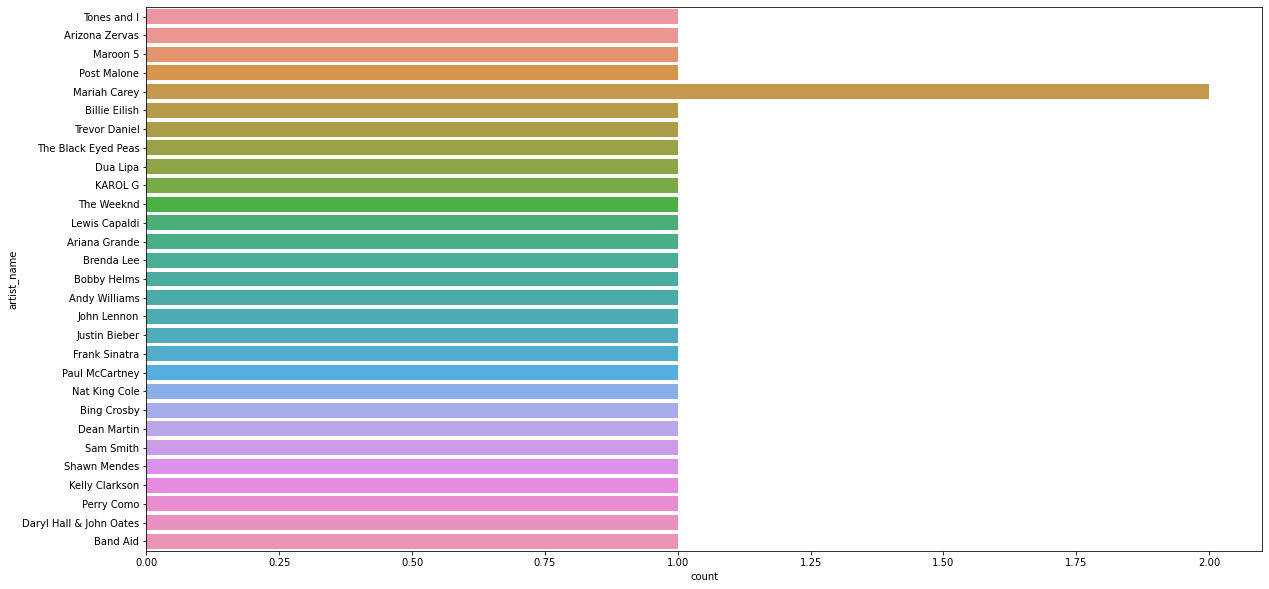

In [86]:
# Checking Histogram of artist name. 
plt.figure(figsize=(20,10))
sns.countplot(y=df['artist_name'][:30])
plt.show()

##### As data is very huge, we cannot definitely say, who is most frequent artist, but we can check it without graph

In [87]:
#get the most frequent artist in dataset in tuple 
from collections import Counter
Counter(df['artist_name']).most_common()

[('Michael Bublé', 32),
 ('Mariah Carey', 19),
 ('Tones and I', 18),
 ('Ariana Grande', 17),
 ('Arizona Zervas', 14),
 ('Wham!', 13),
 ('Dalex', 12),
 ('Post Malone', 11),
 ('Bobby Helms', 11),
 ('Shawn Mendes', 11),
 ('J Balvin', 11),
 ('Sech', 11),
 ('Lunay', 11),
 ('Maroon 5', 10),
 ('Frank Sinatra', 10),
 ('Bing Crosby', 10),
 ('José Feliciano', 10),
 ('The Jackson 5', 10),
 ('Bad Bunny', 10),
 ('Billie Eilish', 9),
 ('Trevor Daniel', 9),
 ('Brenda Lee', 9),
 ('Andy Williams', 9),
 ('John Lennon', 9),
 ('Justin Bieber', 9),
 ('Dean Martin', 9),
 ('Kelly Clarkson', 9),
 ('The Black Eyed Peas', 8),
 ('The Weeknd', 8),
 ('Nat King Cole', 8),
 ('Sam Smith', 8),
 ('Rich Music LTD', 8),
 ('ROSALÍA', 8),
 ('Paul McCartney', 7),
 ('Band Aid', 7),
 ('Ed Sheeran', 7),
 ('Jhay Cortez', 7),
 ('Dimelo Flow', 7),
 ('tha Supreme', 7),
 ('Dua Lipa', 6),
 ('KAROL G', 6),
 ('Lewis Capaldi', 6),
 ('Daryl Hall & John Oates', 6),
 ('Elvis Presley', 6),
 ('Burl Ives', 6),
 ('The Ronettes', 6),
 ("Shakin

##### Yeah frequent artist in this dataset is Michael Buble

### 3.3 Data validation: identify columns with missed values
We need to perform some data validation to make sure that dataset is complete. 


In [88]:
# create dataframe with column names and number of values in each column
df_validation = pd.DataFrame()
df_validation["Columns"] = list(df.columns)
df_validation["Count"] = list(df.count())

df_validation.head(5)

,Columns,Count
0,id,1000
1,track_name,1000
2,artist_name,1000
3,genre,1000
4,year,1000


<a id="Data_visualizations"></a>
## Data Visualization

### Q1:The analysis of the songs regarding to its implementer

In this code we tried to count the songs regarding to artists.

In [89]:
df_top = df.sort_values(by='popularity',ascending=False).head(150)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

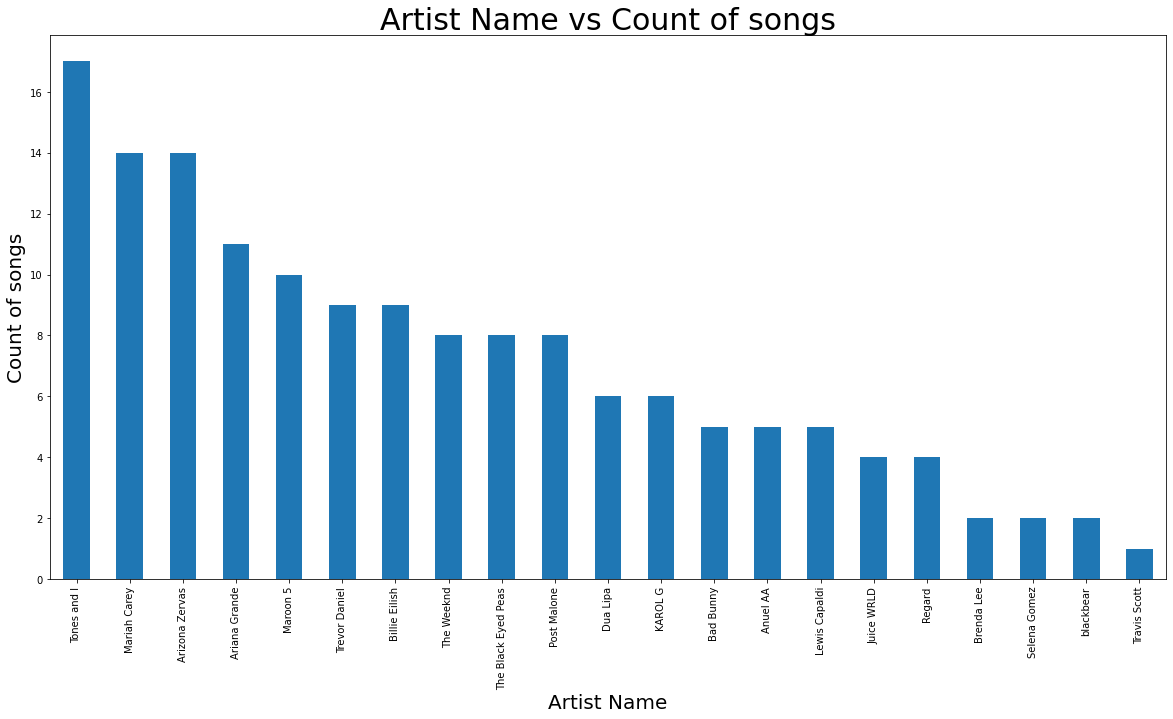

In [90]:
fig = plt.figure(figsize = (20,10)) #form of the graph
df_top.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20) #name of x side
plt.ylabel('Count of songs', fontsize = 20) #name of y side
plt.title('Artist Name vs Count of songs', fontsize = 30) #general title

### Q2:What genre is the most listened to? And provide examples.

This graph illustrates the amount of various typ of genres used in Spotify. 

Text(0, 0.5, 'Genre')

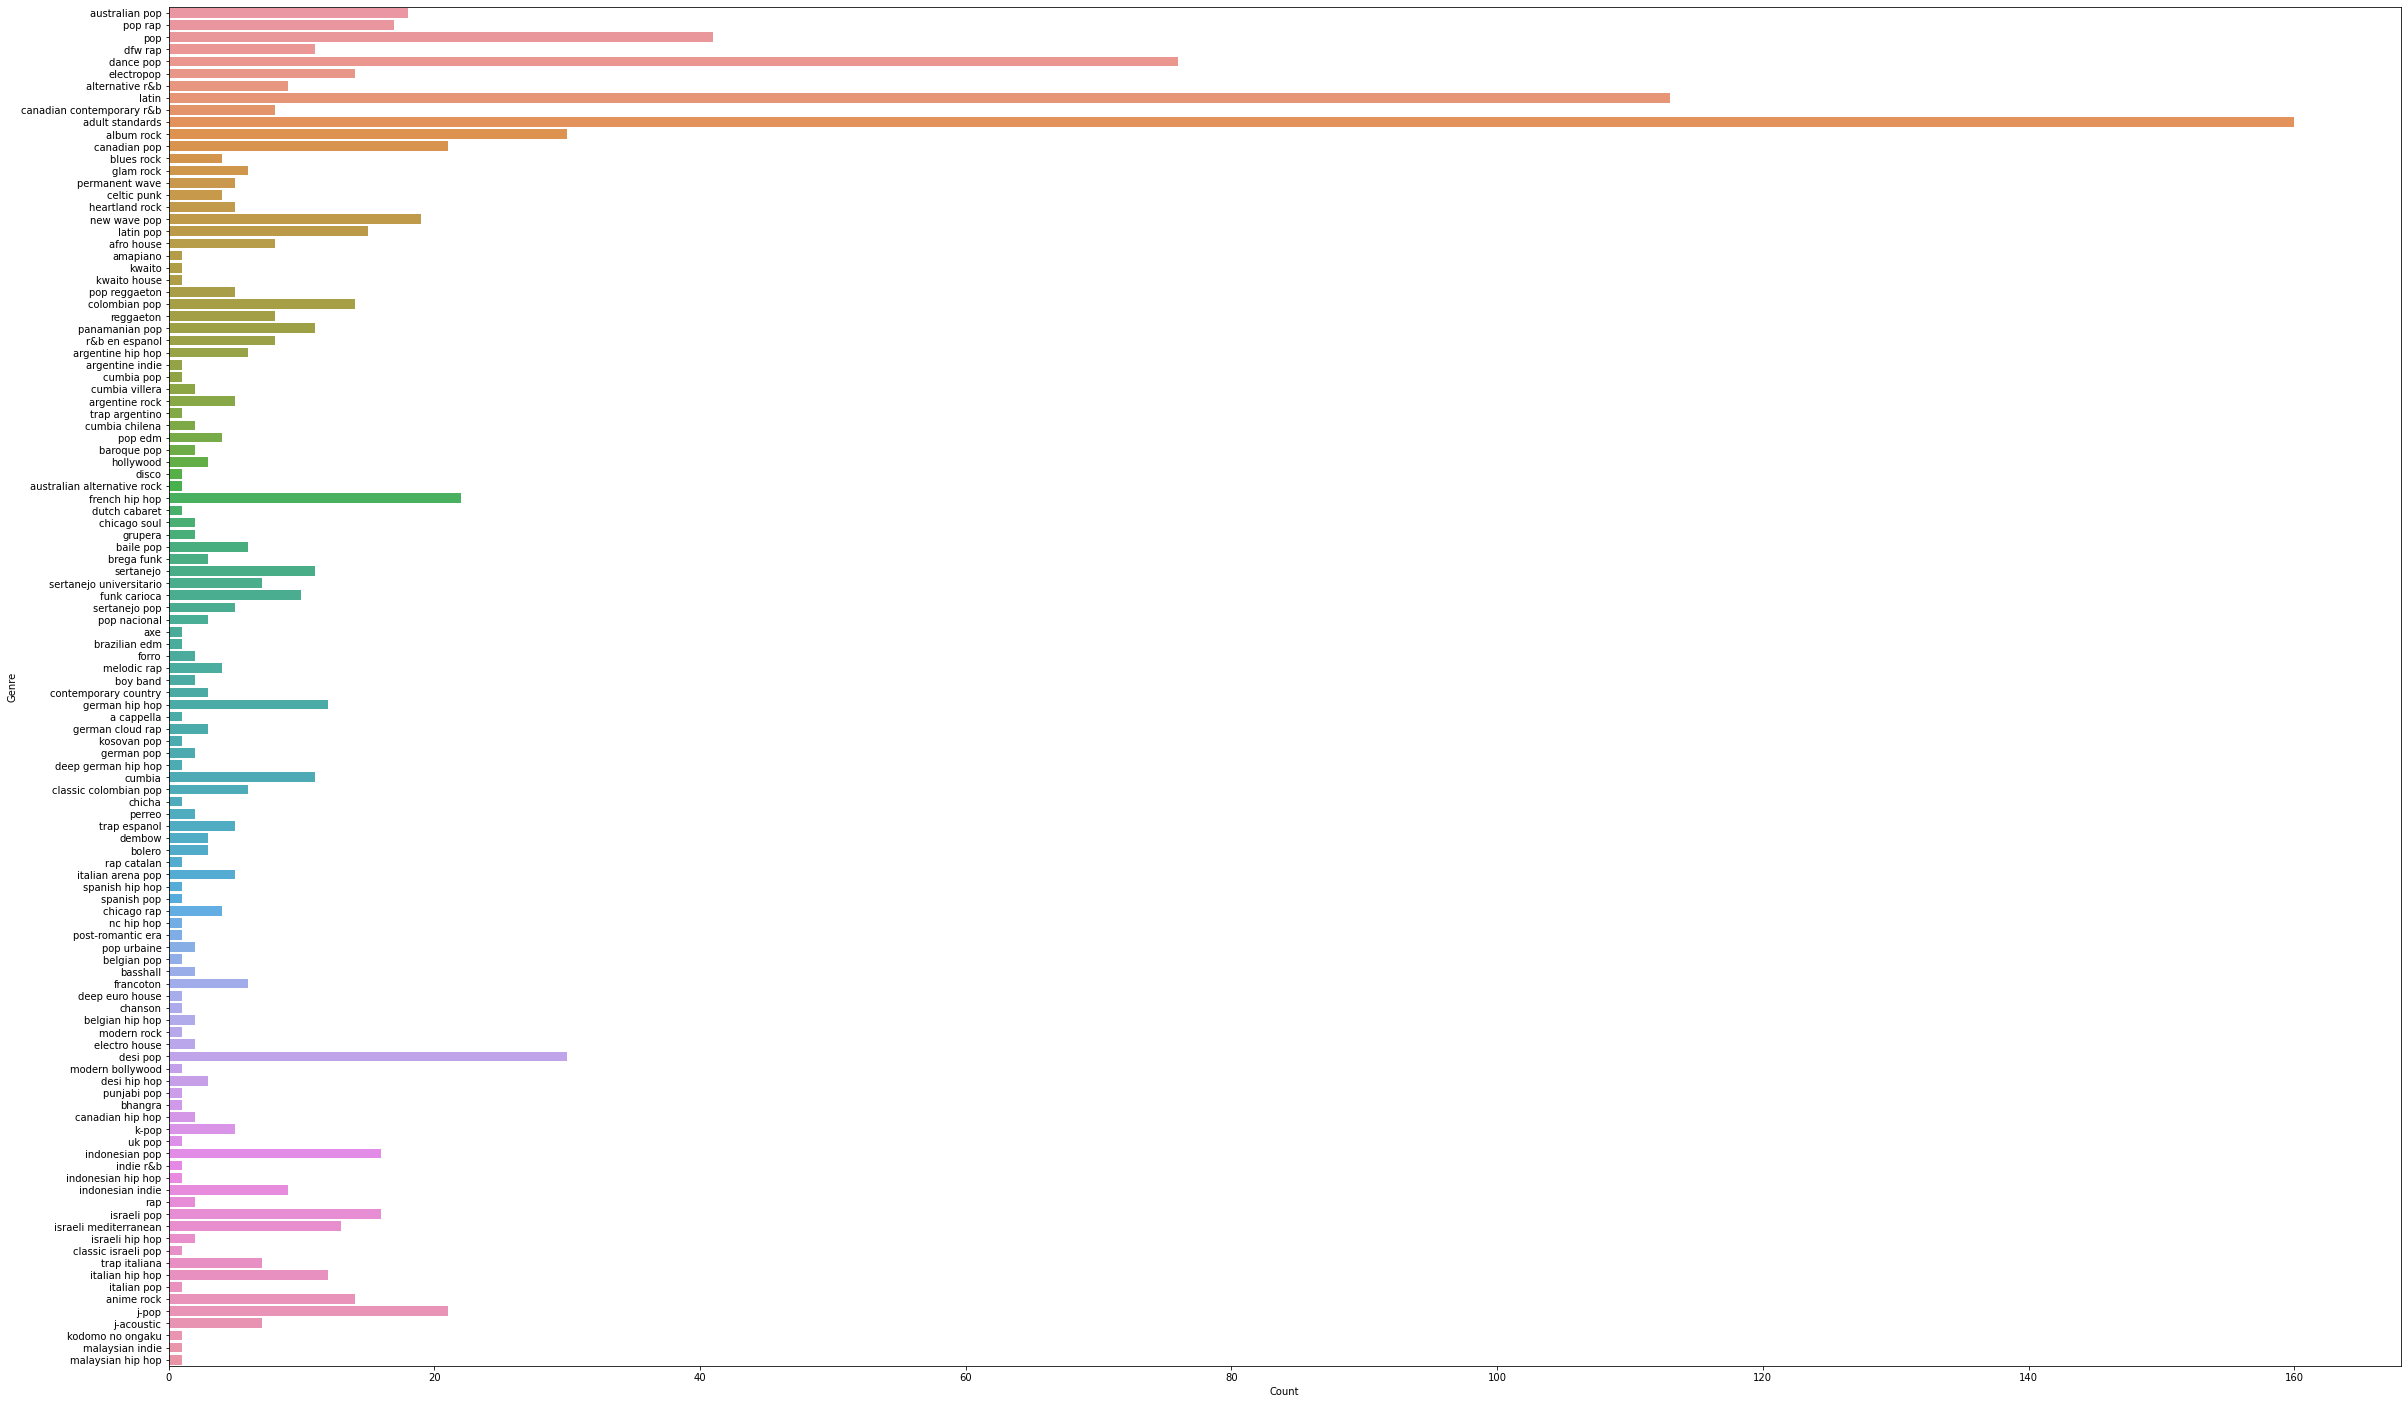

In [91]:
# plotting between Genre and count
plt.figure(figsize=(40, 25))
sns.countplot(y = df.genre)
plt.xlabel("Count")
plt.ylabel("Genre")
#count of genres and explain by graph

Text(0.5, 1.0, 'Relationship between Genre & Popularity')

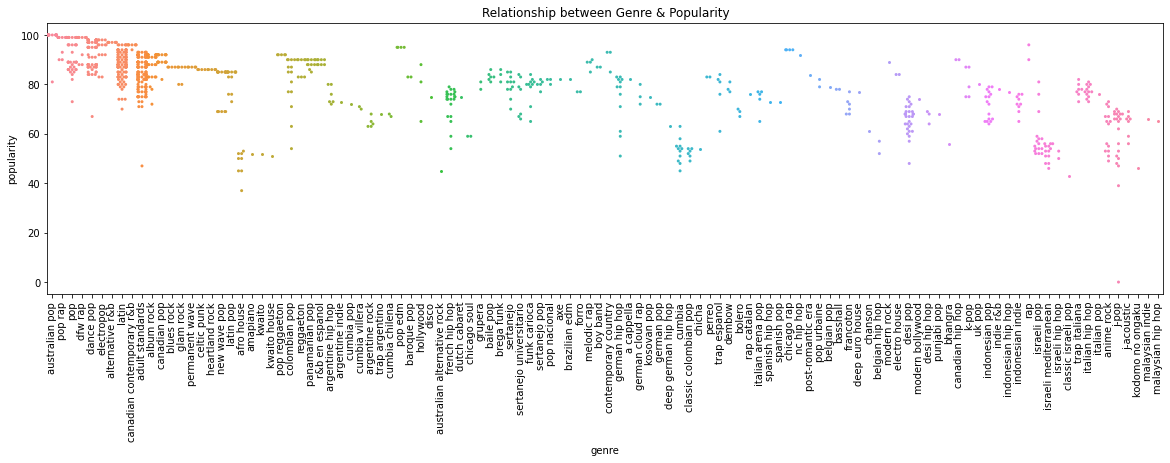

In [92]:
plt.figure(figsize=(20, 5))
swarmplot=sns.swarmplot(x='genre',y='popularity',data=df, s=3)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title('Relationship between Genre & Popularity')

In [93]:
#In this step I searched "anaconda prompt" and typed "pip install wordcloud & pip install squarify" to get more interesting graphs
### install worldcloud library
#pip install worldcloud

In [94]:
from wordcloud import WordCloud, STOPWORDS

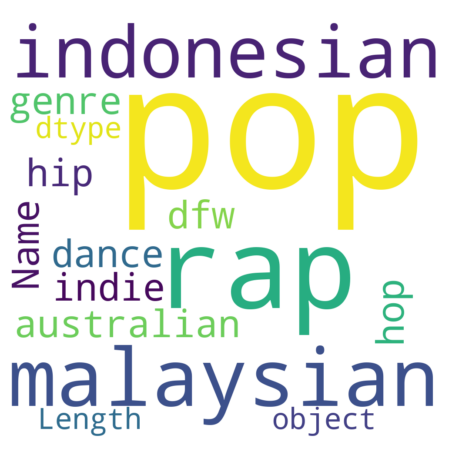

In [95]:
string=str(df.genre)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1000,
                      height=1000).generate(string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Q3: What is the main difference and advantages of the Spotify comparable to other music platforms ?

Spotify’s application hosts over 50M songs and 4B playlists, garnering massive amounts of data related to song preferences, search behavior, playlist data, geographic location and most used devices. Spotify performs analysis and creates machine learning algorithms based on this data to understand music tastes and ease discovery of new genres, artists and songs.


Spotify utilizes AI through their predictive recommendation engine which enables them to curate personalized playlists such as “Discovery Weekly” and “Release Radar.” The engine is built upon a combination of collaborative filtering, natural language processing and audio models to create a personalized list of thirty songs for each user. This type of recommendation engine creates value for artists who get more exposure to new users and makes customers stickier through increased satisfaction with the service. The recommendation will only become smarter over time as more and more data is fed into the ecosystem. Similar to the recommendation engine, Spotify is also experimenting with AI to facilitate the search process and streamline the user prompted discovery of new music.

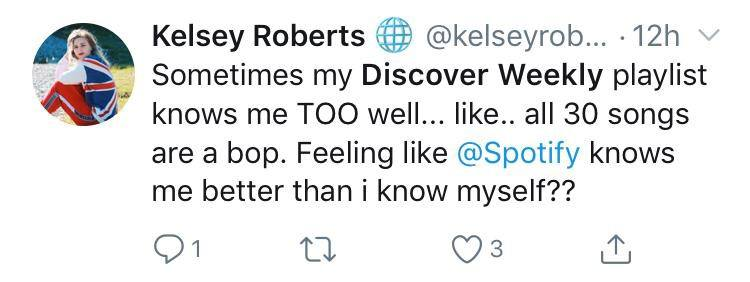

In [96]:
from IPython.display import Image
Image(filename = "rec.jpeg", width = 600, height = 300)

The Spotify algorithm finds relationships among data such as Loudness and Popularity, and gives the corresponding music as a recommendation, as here

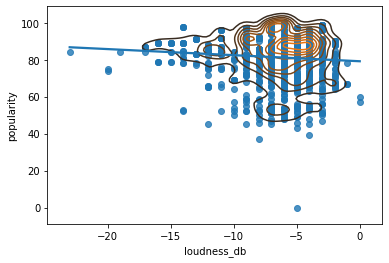

In [97]:
datas=sns.regplot(x='loudness_db',y='popularity',data=df,ci=None)
sns.kdeplot(df.loudness_db,df.popularity)
plt.show()

### Q4: Who is the most valuable artist?

Separate the top most popular artists in Spotify from the overall date set

In [98]:
#pip install squarify

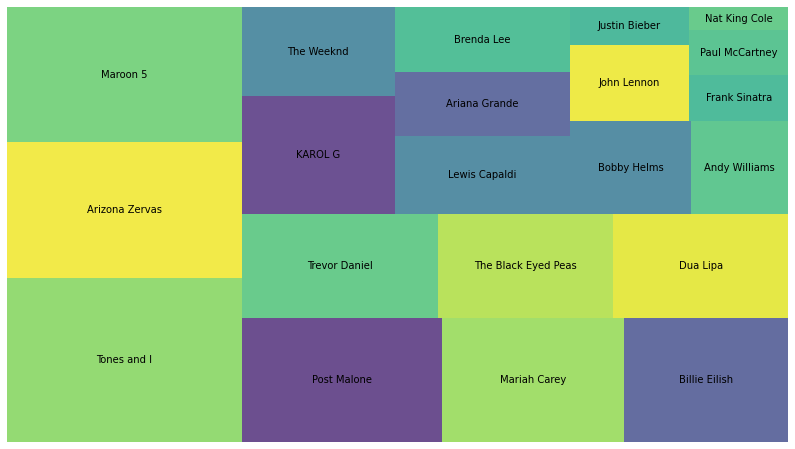

In [99]:
import squarify
plt.figure(figsize=(14,8))
squarify.plot(sizes=df_top.artist_name.value_counts(), label=df["artist_name"], alpha=.8 )
plt.axis('off')
plt.show()

###### We can confidently say that Tones and I are the best artist in this dataset

### Q5: Analyze tracks by their parameters and find the correlation between them, whether they are available, and whether they depend on popularity? 

In [100]:
pd.set_option('precision', 3) #get correllation of our dataset by spearmans method to describe their relations
corr = df.corr(method='spearman')

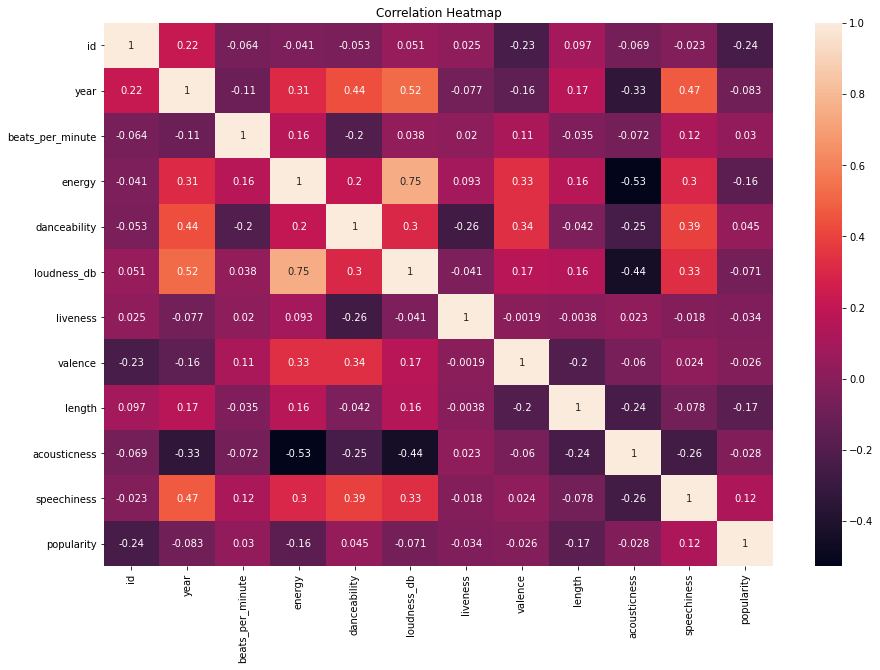

In [101]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

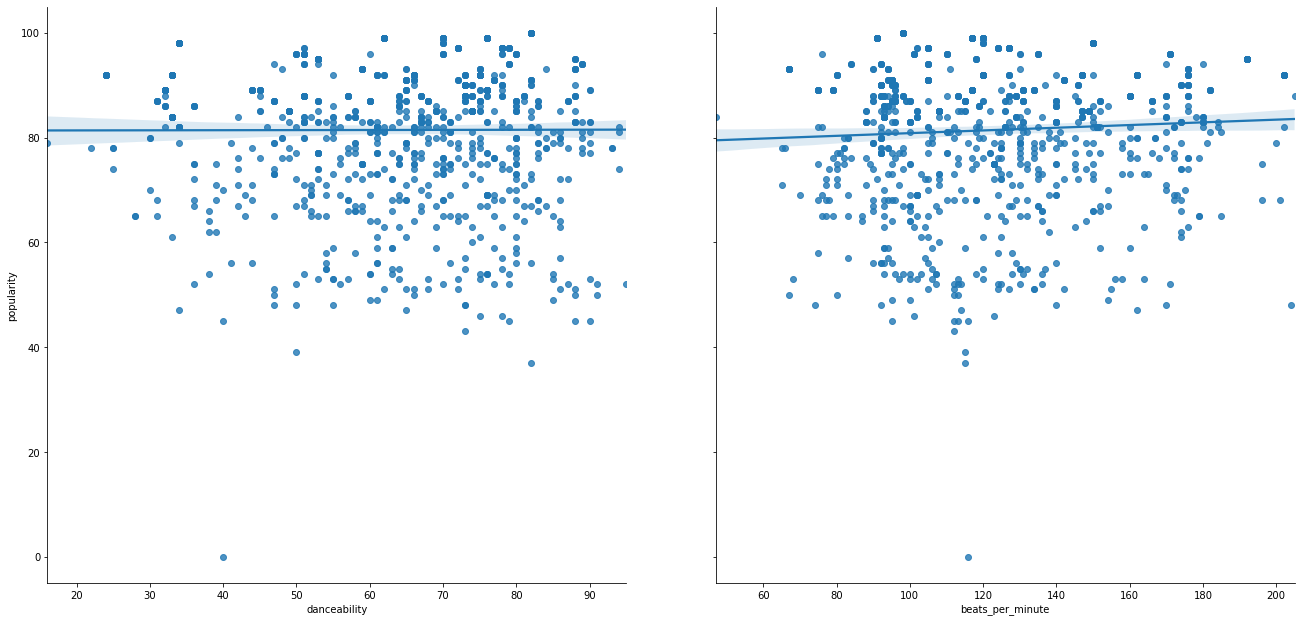

In [102]:
#corr heat map shows that danceability is most likely relating to our popularity 
figure = sns.pairplot(df, x_vars=['danceability','beats_per_minute'], y_vars=['popularity'], kind='reg')
figure.fig.set_size_inches(20, 10)

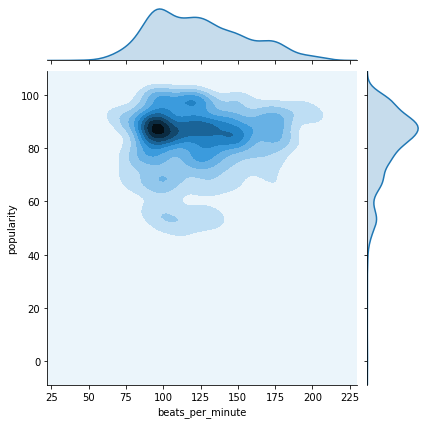

In [103]:
#check how bpm need to track to be popular
sns.jointplot(x="beats_per_minute", y="popularity", data=df, kind="kde");

##### What we can tell by looking at these graphs, many popular songs have a BPM of about 100.

<a id="Conclusion"></a>
## Conclusion

To summarize, I had a lot of fun doing this Spotify data analysis and visualization project. Who would have thought that Tones & I and Arizona Zervas have many tracks? Or is "adult standards" the most popular genre with a lot of songs? Or that Justin Bieber is not as valuable artist as Billie Eilish or Dua Lipa.

In any case, you can view the full markdowns, separate codes for data processing and visualizations above. From my own perspective, the project is very clear and interesting.
